In [137]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import scipy.integrate as integrate
from sklearn.linear_model import  LogisticRegression
import matplotlib.pyplot as plt

In [36]:
# Entropy
df1 = pd.read_excel('.././csv/test_data1.xlsx')
df1.head(5)

,Job,Education,Any Previous Loan,Salary,Housing Loan
0,Business,Schooling,No,Medium,No
1,Business,PG degree,No,Medium,Yes
2,Salaried,UG degree,No,High,No
3,Business,PG degree,Yes,Low,Yes
4,Business,Schooling,No,Low,Yes


In [33]:
y = df1['Housing Loan'].map({'Yes':1,'No':0})
stats.entropy(np.bincount(y), base=2)

0.9774178175281716

In [1]:
# Combined Airthmetic mean
a_n = 695
b_n = 597
a_avg_sal = 13875
b_avg_sal = 17086
avg_sal = ((a_n*a_avg_sal)+(b_n*b_avg_sal))/(a_n+b_n)
avg_sal

15358.720588235294

In [42]:
df2 = pd.read_excel('.././csv/test_data2.xlsx')
df2.head(5)

,Job,Education,Any Previous\nLoan,Salary,Housing\nLoan
0,Business,Schooling,No,Low,No
1,Salaried,Schooling,Yes,High,No
2,Business,PG degree,Yes,Medium,Yes
3,Research\nAssistant,Phd,Yes,High,No
4,Salaried,PG degree,No,Medium,No


In [53]:
df.iloc[-2:].columns

Index(['Job', 'Education', 'Any Previous Loan', 'Salary', 'Housing Loan'], dtype='object')

In [71]:
# Entropy to decide class
k = 0
for col in df2.iloc[:,:-1].columns:
    x_job = df2[col].value_counts()
    entropy_val = stats.entropy(x_job, base=2)
    if entropy_val > k :
        k = entropy_val
        col_k = col    
print(col_k,k)   

Education 1.884313527799799


In [49]:
x_sal = df2['Salary'].value_counts()
scipy.stats.entropy(x_sal, base=2)

1.5262349099495225

In [84]:
#F-Statistic
grp1 = [14,24,18,14,22,17]
grp2 = [2,8,10,5,8,3]
grp1_var = 4
grp2_var = 8
alpha = 0.05
f1_val = grp1_var/grp2_var
grp1_df = len(grp1) - 1
grp2_df = len(grp2) - 1
p_val = 1- stats.f.cdf(f1_val,grp1_df,grp2_df)
f_crtical_val = stats.f.ppf(1 - alpha, grp1_df, grp2_df)
print(f1_val,p_val,f_crtical_val)

0.5 0.7674886808696214 5.050329057632646


In [86]:
#Vector Distance
arr1 = np.array ([2,-5,9,8])
arr2 = np.array ([-9,-7,-7,-7])
diff1 =  arr1 - arr2
eul_ditance = np.sqrt(np.dot(diff1.T,diff1))
eul_ditance

24.61706725018234

In [94]:
#Adjoint
matrix = np.array([ [-1,-3,3,-1],
           [2,1,3,1],
           [-1,-2,1,-3],
           [-3,-2,2,-1]])
det = np.linalg.det(matrix)
if (det != 0):
  cofac = np.linalg.inv(matrix).T * det
cofac.T

array([[ 15.,   1.,   4., -26.],
       [-35.,  18.,  11.,  20.],
       [ -4.,  16.,   3.,  11.],
       [ 17.,  -7., -28.,  -1.]])

In [98]:
# SVD
arr3 = [[-4,-3,1],[4,-1,1]]
u,s,t = np.linalg.svd(arr3)
prod_single_val = np.prod(s)
print(s,prod_single_val)

[5.88634952 3.05792239] 18.0


In [99]:
import copy
x = [5,4,3,2,1]
y = [7,8,9]
z = [x,y]
a= copy.deepcopy(z)
b= copy.copy(z)
x[2] = 6
print(a,b)

[[5, 4, 3, 2, 1], [7, 8, 9]] [[5, 4, 6, 2, 1], [7, 8, 9]]


In [100]:
#Chi Square test
df3 = pd.read_excel('.././csv/test_data3.xlsx')
df3.head(5)

,Job,Education,Any Previous\nLoan,Salary,Housing\nLoan
0,Business,Schooling,No,Low,No
1,Salaried,Schooling,Yes,High,No
2,Business,PG degree,Yes,Medium,Yes
3,Research\nAssistant,Phd,Yes,High,No
4,Salaried,PG degree,No,Medium,No


In [107]:
lbl_en = LabelEncoder()
for col in df3.iloc[:,0:-1].columns:
    df3[col] = lbl_en.fit_transform(df3[col])  

In [108]:
X = df3.iloc[:,0:-1]
y = df3.iloc[:,-1]
chi_scores = chi2(X,y)
print(chi_scores)

(array([1.44444444, 0.0462963 , 1.38888889, 1.77962963]), array([0.22942148, 0.8296381 , 0.23859283, 0.18219481]))


In [110]:
sr_chi_scores = pd.Series(chi_scores[0],index = df3.iloc[:,0:-1].columns)
sr_chi_scores.sort_values(ascending=False, inplace=True)
sr_chi_scores

Salary                1.779630
Job                   1.444444
Any Previous\nLoan    1.388889
Education             0.046296
dtype: float64

In [165]:
#PDF

# define expression without constant
def unnor_exp(x):
     return  1 / np.sqrt(x)
integral_val, _ = integrate.quad(unnor_exp, 16, 169)

#find constant
c = 1 / integral_val #reciprocation

# calculate again using constant c
def nor_exp(x):
     return c / np.sqrt(x)
integral_nor, _ = integrate.quad(nor_exp, 16, 169) # must be 1

# Compute P(x > 81) using the normalized PDF
integral_p81, _ = integrate.quad(nor_exp, 81, 169)

integral_p81 #p(x>81)

0.44444444444444425

In [114]:
#Slicing
x = (1,2,3,4,5)
y= slice(1,-2)
print(x[y])

(2, 3)


In [121]:
#Linear Equations
arr4 = [[2,1,2],[2,-1,-1],[2,1,-3]]
a = np.matrix(arr4)
b = np.matrix([[-13],[2],[2]])
#find inverse of a
a_inv = np.linalg.inv(a)
#solving for x = A inv *B
ans = np.dot(a_inv , b)
ans
alternate_ans = np.linalg.solve(a,b)
print(ans,alternate_ans)

[[-2.]
 [-3.]
 [-3.]] [[-2.]
 [-3.]
 [-3.]]


In [122]:
# Logistic Regression
df4 = pd.read_excel('.././csv/test_data4.xlsx')
df4.head(5)

,No. of hours studied(x1),No. of classes missed(x2),y
0,8.44,3.0,1
1,3.21,12.0,0
2,4.43,8.0,0
3,7.52,5.0,1
4,2.88,9.0,0


In [146]:
x = df4.iloc[:,0:2]
y = df4.iloc[:,-1:]
log_model = LogisticRegression()
log_model.fit(x,y)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [150]:
log_model.coef_

array([[ 0.64879576, -0.60479361]])

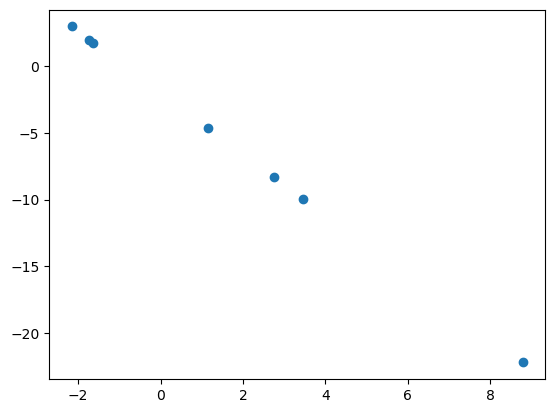

In [151]:
# Correlation
x = [1.15,-2.16,-1.73,-1.63 ,8.79 ,2.76 , 3.46 ]
y = [-4.64,2.98, 1.99, 1.76,-22.21,-8.34,-9.95]
plt.scatter(x,y) #Monotonic decrease